# Car price prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import unicodedata
import seaborn as sns
import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<font color=#010190 size = 4> Data Understanding

In [2]:
df = pd.read_csv("dataset.csv")
df.head(5)

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,998 CC,5.0,7525
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,1582 CC,5.0,53750
2,Honda Jazz V,2011,46000,Petrol,Manual,1199 CC,5.0,19350
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,1248 CC,7.0,25800
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,1968 CC,5.0,76282


In [3]:
df.describe(include = 'all')

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Seats,Price
count,6019,6019.000000,6.019000e+03,6019,6019,5983,5977.000000,6019.000000
unique,1876,NaN,NaN,5,2,146,NaN,NaN
top,Mahindra XUV500 W8 2WD,NaN,NaN,Diesel,Manual,1197 CC,NaN,NaN
freq,49,NaN,NaN,3205,4299,606,NaN,NaN
mean,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,5.278735,40761.713906
std,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,0.808840,48108.043584
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,1892.000000
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,5.000000,15050.000000
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,5.000000,24252.000000
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,5.000000,42785.000000


In [4]:
df.isna().sum()

Name                  0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Engine               36
Seats                42
Price                 0
dtype: int64

We found that the 'Engine' and 'Seats' features contains nan values

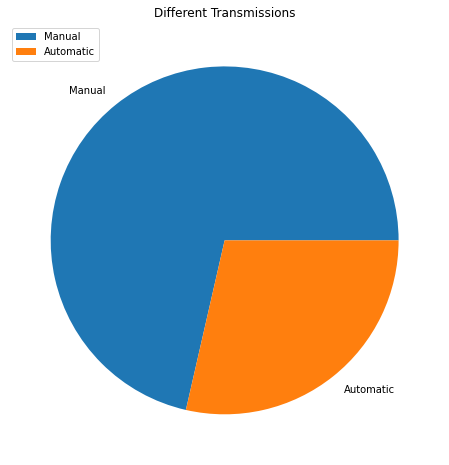

In [6]:
plt.figure(figsize=(8,8))
plt.pie(df["Transmission"].value_counts().values,labels = df["Transmission"].value_counts().index)
plt.legend(loc="upper left")
plt.title("Different Transmissions")
plt.show()

### We notice that the majority of the vehicules have manual transmission

Text(0, 0.5, 'Count of cars')

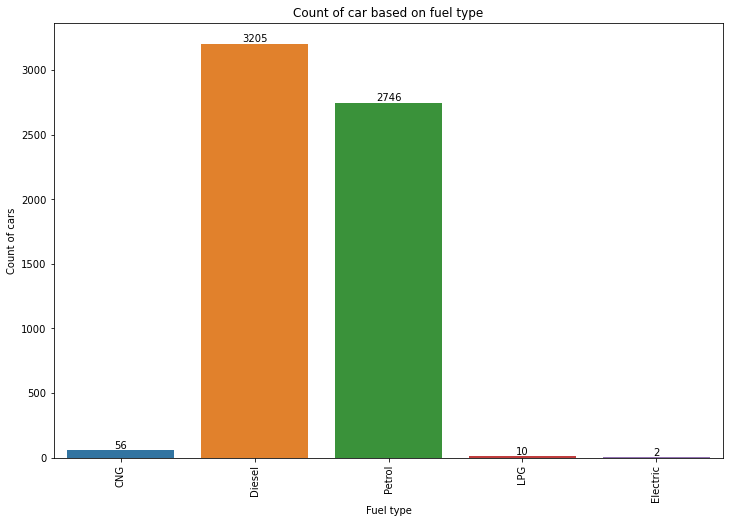

In [7]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Fuel_Type', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of car based on fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Count of cars")

### Diesel and Petrol fuel types represent the majority in our dataset

Text(0, 0.5, 'Count of cars')

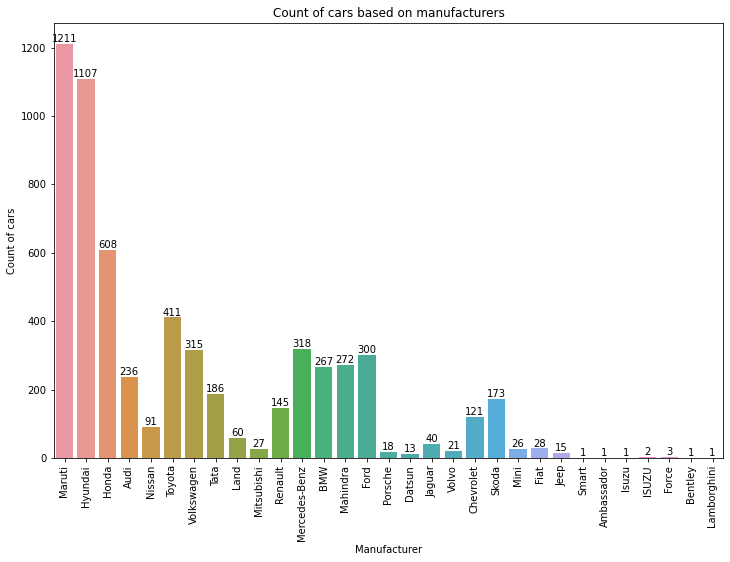

In [8]:

df['Name'] = df['Name'].map(lambda x : re.split(r' ', x)[0])

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Name', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

<font color=#010190 size = 4> In order to change the features 'Transmission' and 'Fuel type' from object to integer, we managed to classify the string values

In [9]:
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2,'LPG':3,'Electric':4})

In [10]:
df["Engine"]= df["Engine"].str.split(" ", expand = True)
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)
df["Seats"].fillna(df["Seats"].astype("float64").mean(), inplace = True)


In [11]:
def toInt(x):
    i = int(x)
    return i

df["Engine"] = df["Engine"].map(lambda x: toInt(x))

In [12]:
df.isna().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Engine               0
Seats                0
Price                0
dtype: int64

Text(0.5, 1.0, 'Price and engine')

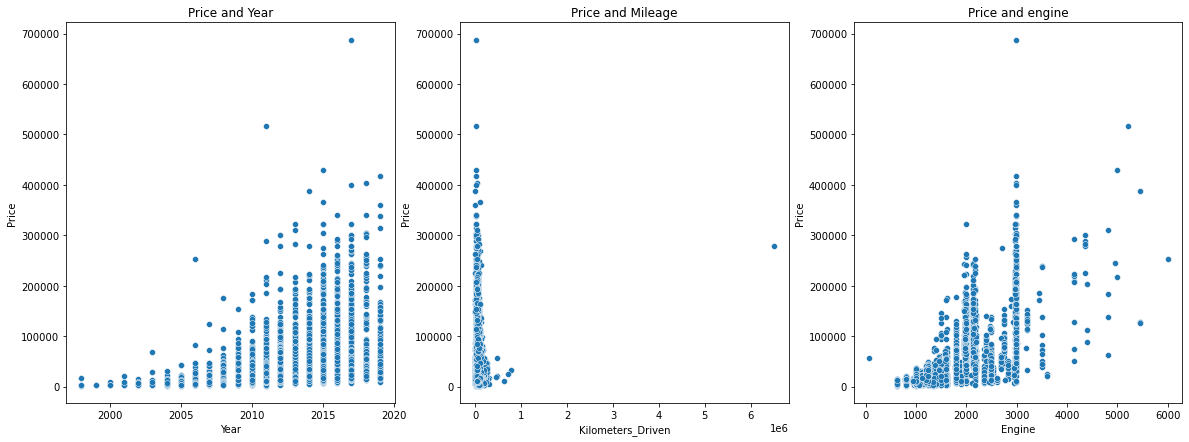

In [13]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=df)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(y='Price',x='Kilometers_Driven',data=df)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='Engine',data=df)
plt.title("Price and engine")

  <font color=#010190 size = 4> In the first plot, we noticed that the car price increase through the years. 
    
  <font color=#010190 size = 4> In the second plot, we noticed that the price decrease when the mileage increase
      
  <font color=#010190 size = 4> In the third plot, we noticed that the price increase when the engine power is high

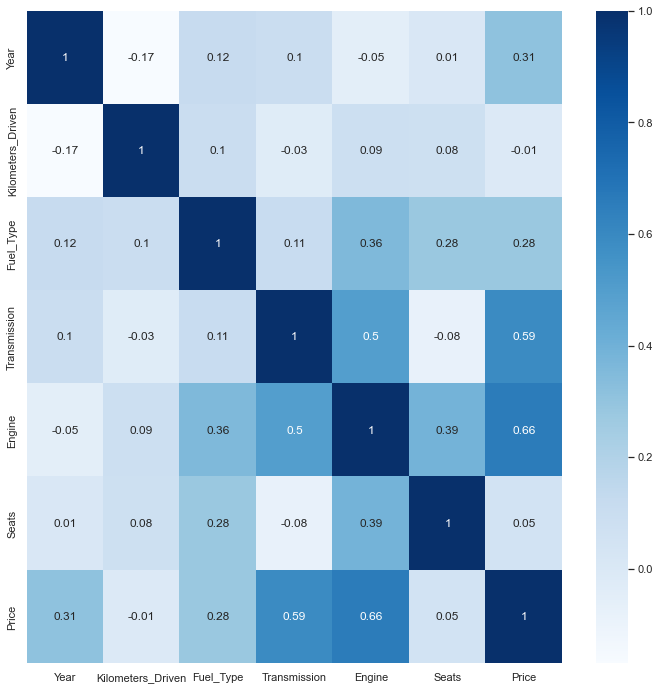

In [14]:
f = plt.figure(figsize=(12, 12))
sns.set()
sns.heatmap(df.corr().round(2), annot=True, cmap="Blues")

<font color=#010190 size = 4> We noticed that we have a strong correlation between 'Engine' and 'Price' features, 'Transmission' and 'Price' features, 'Transmission' and 'Engine' features
    
 <font color=#010190 size = 4> The rest seems uncorrelated.

In [15]:
X = df.drop(['Price'],axis=1).copy()
y = df['Price'].values.copy() 

In [16]:
X

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Seats
0,Maruti,2010,72000,2,0,998,5.0
1,Hyundai,2015,41000,1,0,1582,5.0
2,Honda,2011,46000,0,0,1199,5.0
3,Maruti,2012,87000,1,0,1248,7.0
4,Audi,2013,40670,1,1,1968,5.0
...,...,...,...,...,...,...,...
6014,Maruti,2014,27365,1,0,1248,5.0
6015,Hyundai,2015,100000,1,0,1120,5.0
6016,Mahindra,2012,55000,1,0,2498,8.0
6017,Maruti,2013,46000,0,0,998,5.0


In [17]:
y

array([ 7525, 53750, 19350, ..., 12470, 11395, 10750], dtype=int64)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color=#010190 size = 4> The feature 'Name' contains various type of values. It consists of categorical values. So, in-order to use those categorical values for programming efficiently we create dummy variables.

In [19]:
X_train = pd.get_dummies(X_train,
                         columns = ["Name"],
                         drop_first = True)

In [20]:
X_test = pd.get_dummies(X_test,
                         columns = ["Name"],
                         drop_first = True)

In [21]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

<font color=#010190 size = 4> Finally, as the last step of data processing, we did data scaling.

In [22]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

<font color=#010190 size = 6> Training the model

In [23]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
models=[]

Lasso=linear_model.Lasso().fit(X_train,y_train)
models.append(Lasso)
Ridge=linear_model.Ridge().fit(X_train,y_train)
models.append(Ridge)
EN=linear_model.ElasticNet().fit(X_train,y_train)
models.append(EN)
RFR=ensemble.RandomForestRegressor().fit(X_train,y_train)
models.append(RFR)
GBT=ensemble.GradientBoostingRegressor().fit(X_train,y_train)
models.append(GBT)
ETR=ensemble.ExtraTreesRegressor().fit(X_train,y_train)
models.append(ETR)



In [24]:
from sklearn import metrics
def evaluations(model,X_test,y_test):
    
    scores=metrics.r2_score(y_test,model.predict(X_test))
    mse=metrics.mean_squared_error(y_test, model.predict(X_test))
    mae=metrics.median_absolute_error(y_test, model.predict(X_test))
    rmse=metrics.mean_squared_error(y_test, model.predict(X_test))
    print('Model: ',model)
    print('Rsquared: ', scores)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('**************************')

In [25]:
for model in models:
    evaluations(model,X_test,y_test)

Model:  Lasso()
Rsquared:  0.7356400889623512
MAE:  7938.2127317646555
MSE:  584724874.4049964
RMSE:  584724874.4049964
**************************
Model:  Ridge()
Rsquared:  0.7356050184220294
MAE:  7928.155069289547
MSE:  584802445.2333589
RMSE:  584802445.2333589
**************************
Model:  ElasticNet()
Rsquared:  0.6694297125961
MAE:  7333.224915895389
MSE:  731172396.8493139
RMSE:  731172396.8493139
**************************
Model:  RandomForestRegressor()
Rsquared:  0.8490795943030196
MAE:  3452.8999999999996
MSE:  333813530.6519689
RMSE:  333813530.6519689
**************************
Model:  GradientBoostingRegressor()
Rsquared:  0.8554809722425529
MAE:  4178.196873283311
MSE:  319654633.0452156
RMSE:  319654633.0452156
**************************
Model:  ExtraTreesRegressor()
Rsquared:  0.8381936693116441
MAE:  3378.725
MSE:  357891580.5286682
RMSE:  357891580.5286682
**************************


<font color=#010190 size = 4> Both Random Forest Regressor and Gradient Bosst Regressor have the best R squerred, so we chose these two models to work with.

<font color=#010190 size = 5> Models with GridSearch

In [29]:
#setting parameters 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor  
parameters = {
    'loss': ['ls', 'lad','huber','quantile'],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [3,5,6]
} 

In [31]:
GBRG = GridSearchCV(GradientBoostingRegressor(), parameters, verbose=1,cv=5,n_jobs=-1) 
GBRG.fit(X_train,y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.9s finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 5, 6]},
             verbose=1)

In [33]:
GBRG.best_params_


{'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 6}

In [34]:
evaluations(GBRG,X_test,y_test)

Model:  GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 5, 6]},
             verbose=1)
Rsquared:  0.8568779679798268
MAE:  3489.6924641575424
MSE:  316564685.8825935
RMSE:  316564685.8825935
**************************


In [40]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)


<font color=#010190 size = 5> Models with RandomizedSearch

In [42]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = ensemble.RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train, y_train)
rf_random.best_params_


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


NameError: name 'mean_squared_error' is not defined

In [45]:
evaluations(rf_random,X_test,y_test)

Model:  RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)
Rsquared:  0.8668769751461759
MAE:  3520.5045703191
MSE:  294448366.5565309
RMSE:  294448366.5565309
**************************


<font color=#010190 size = 4> Thanks to RandomizedSearch, the Rsquarred of the model have improved

In [57]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [61]:
rfc=ensemble.RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [63]:
evaluations(CV_rfc,X_test,y_test)

Model:  GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})
Rsquared:  0.7861914817730405
MAE:  4235.5
MSE:  472912698.7380952
RMSE:  472912698.7380952
**************************


<font color=#010190 size = 4> Thanks to GridSearchCV, the Rsquarred of the model have improved but the RandomizedSearch gave a better one : 86% better than 78%

<font color=#010190 size = 4> Testing the model

In [53]:
features = np.array([[2010,180000,1,1,1960,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
prediction = rf_random.predict(standardScaler.transform(features))

print("Prediction: {}".format(prediction))

Prediction: [33256.38275788]
